# TIØ4317 - Empirical and Quantitative Methods in Finance Project 

In [139]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm

In [140]:
ticker_Bitcoin = yf.Ticker("BTC-USD")  
df_Bitcoin = ticker_Bitcoin.history(period="5y")  

ticker_Bitcoin_Cash = yf.Ticker("BCH-USD")  
df_Bitcoin_Cash = ticker_Bitcoin_Cash.history(period="5y")  


In [141]:
# Data cleaning for Bitcoin
print("Datafile head: \n", df_Bitcoin.head())       
print("Checking for null values:")       
print( df_Bitcoin.info())
print("Statistical precentiles: \n", df_Bitcoin.describe())


Datafile head: 
                                   Open         High          Low        Close  \
Date                                                                            
2020-04-02 00:00:00+00:00  6606.776367  7088.247559  6595.918457  6793.624512   
2020-04-03 00:00:00+00:00  6797.396484  7003.220703  6673.335938  6733.387207   
2020-04-04 00:00:00+00:00  6738.382812  6878.953613  6696.484863  6867.527344   
2020-04-05 00:00:00+00:00  6862.537598  6883.414062  6715.929199  6791.129395   
2020-04-06 00:00:00+00:00  6788.049805  7271.781250  6782.889648  7271.781250   

                                Volume  Dividends  Stock Splits  
Date                                                             
2020-04-02 00:00:00+00:00  47660646124        0.0           0.0  
2020-04-03 00:00:00+00:00  38976504903        0.0           0.0  
2020-04-04 00:00:00+00:00  33185988584        0.0           0.0  
2020-04-05 00:00:00+00:00  29510409856        0.0           0.0  
2020-04-06 00:00:00

In [142]:
# Data cleaning for Bitcoin Cash
print("Datafile head: \n", df_Bitcoin_Cash.head())       
print("Checking for null values:")       
print( df_Bitcoin_Cash.info())    
print("Statistical precentiles: \n", df_Bitcoin_Cash.describe())   

Datafile head: 
                                  Open        High         Low       Close  \
Date                                                                        
2020-04-02 00:00:00+00:00  223.894241  242.664276  223.215851  232.652786   
2020-04-03 00:00:00+00:00  232.513519  241.361298  231.572708  235.813339   
2020-04-04 00:00:00+00:00  235.862167  239.318863  233.081619  238.819336   
2020-04-05 00:00:00+00:00  238.751892  239.705811  228.137573  231.997986   
2020-04-06 00:00:00+00:00  231.933960  256.049805  231.690063  255.919510   

                               Volume  Dividends  Stock Splits  
Date                                                            
2020-04-02 00:00:00+00:00  4225298020        0.0           0.0  
2020-04-03 00:00:00+00:00  3713212644        0.0           0.0  
2020-04-04 00:00:00+00:00  3145975504        0.0           0.0  
2020-04-05 00:00:00+00:00  3000506532        0.0           0.0  
2020-04-06 00:00:00+00:00  4488196701        0.0     

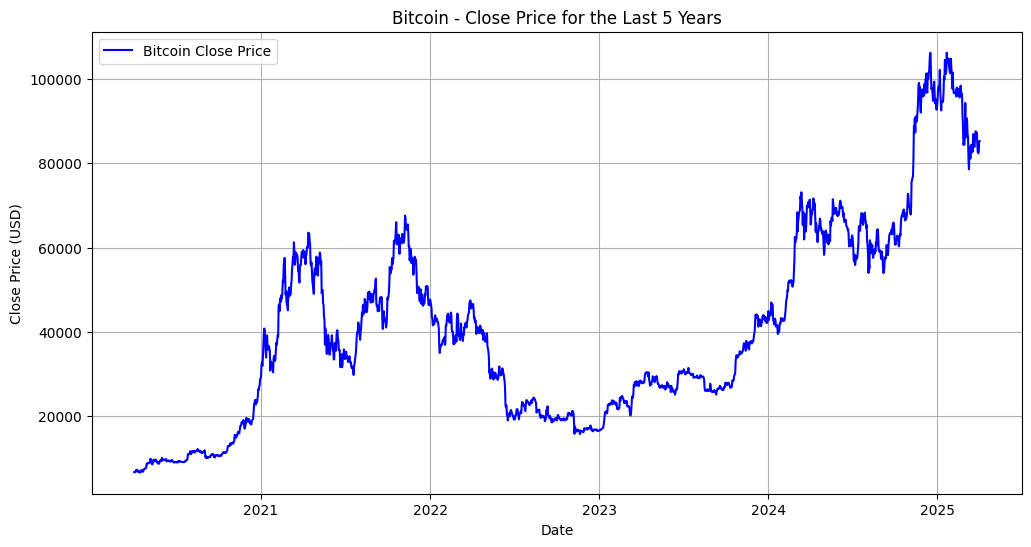

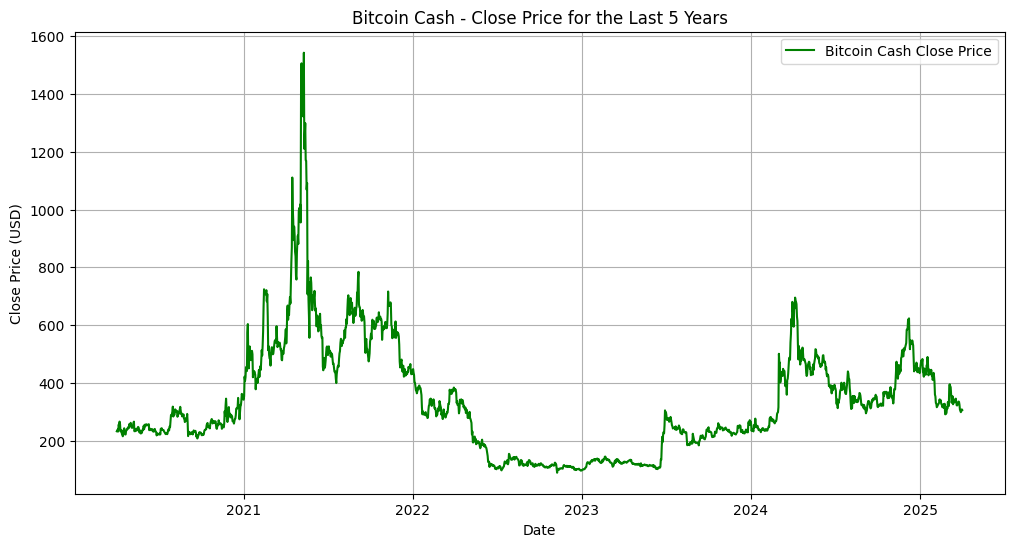

In [143]:
# Plotting closing prices for each day the last 5 years

# Plot for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df_Bitcoin.index, df_Bitcoin["Close"], label="Bitcoin Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Bitcoin - Close Price for the Last 5 Years")
plt.legend()
plt.grid()
plt.show()

# Plot for Bitcoin Cash
plt.figure(figsize=(12, 6))
plt.plot(df_Bitcoin_Cash.index, df_Bitcoin_Cash["Close"], label="Bitcoin Cash Close Price", color="green")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Bitcoin Cash - Close Price for the Last 5 Years")
plt.legend()
plt.grid()
plt.show()


In [144]:
# Add a constant (intercept) to the Bitcoin prices for the regression
X = sm.add_constant(df_Bitcoin['Close'])  # This adds the intercept term to the model
y = df_Bitcoin_Cash['Close']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

intercept = results.params[0]
beta = results.params[1]

# Compute the price spread
price_spread = df_Bitcoin_Cash['Close'] - (intercept + beta * df_Bitcoin['Close'])

# Create the new DataFrame
spread_df = pd.DataFrame({'price_spread': price_spread})

# Check results
print(spread_df.head())
print("Mean spread:", spread_df['price_spread'].mean())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     742.5
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.81e-137
Time:                        15:45:51   Log-Likelihood:                -11894.
No. Observations:                1827   AIC:                         2.379e+04
Df Residuals:                    1825   BIC:                         2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7752      7.590     20.261      0.0

C:\Users\tonal\AppData\Local\Temp\ipykernel_27672\2765678762.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\tonal\AppData\Local\Temp\ipykernel_27672\2765678762.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1]


In [145]:
# ADF Test for bitcoin Log return in closing price
adf_btc_c_log_return = adfuller(spread_df['price_spread'].dropna(), maxlag=10, regression='c')
print("\nADF Test for Log return in bitcoin cash closing price:")
print("Test Statistic:", adf_btc_c_log_return[0])
print("p-value:", adf_btc_c_log_return[1])
print("Critical Values:", adf_btc_c_log_return[4])


ADF Test for Log return in bitcoin cash closing price:
Test Statistic: -2.964979428199652
p-value: 0.03829684733028896
Critical Values: {'1%': -3.4339540519343137, '5%': -2.863131988080628, '10%': -2.5676175211639354}


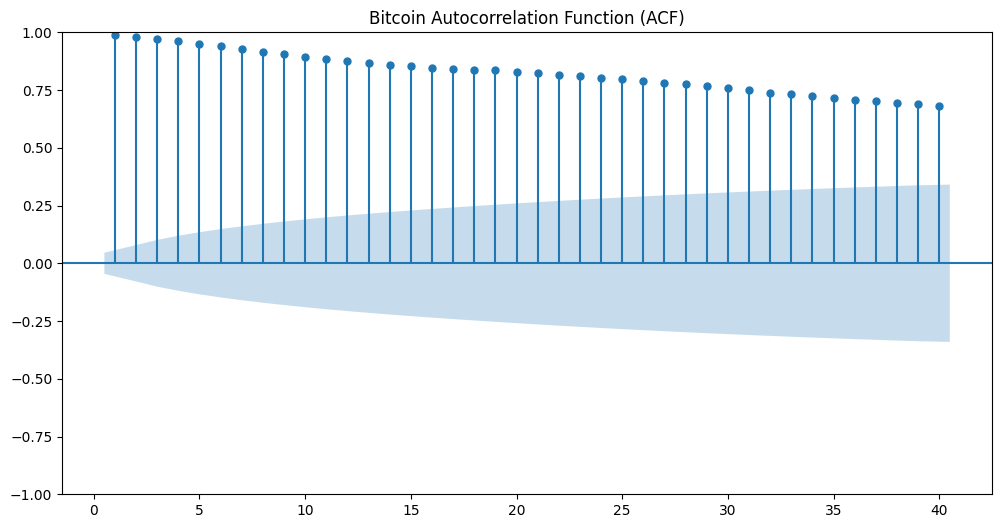

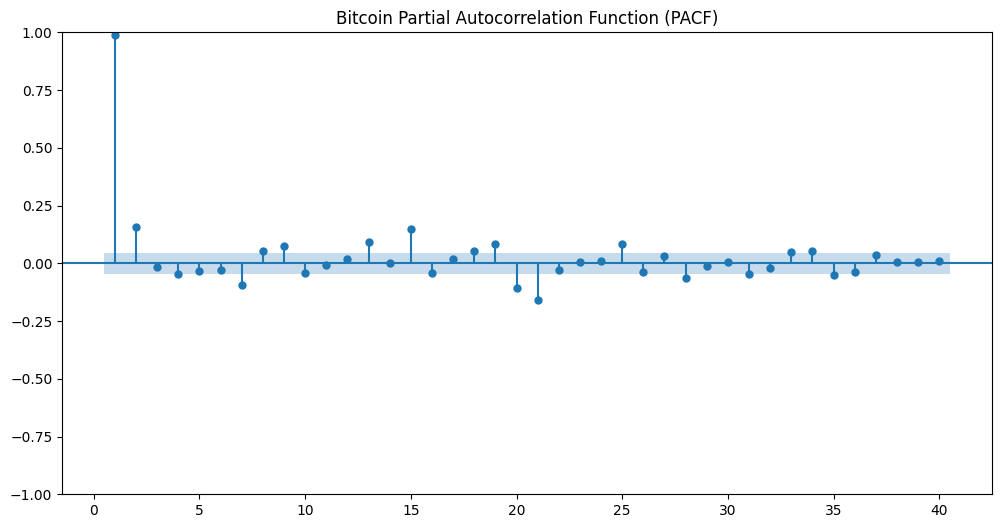

In [146]:
# Plot ACF Bitcoin
plt.figure(figsize=(12,6))
plot_acf(spread_df['price_spread'], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Autocorrelation Function (ACF)')
plt.show()

# Plot PACF Bitcoin
plt.figure(figsize=(12,6))
plot_pacf(spread_df['price_spread'], lags=40, ax=plt.gca(), zero=False)
plt.title('Bitcoin Partial Autocorrelation Function (PACF)')
plt.show()

In [147]:
# Initialize AIC and BIC tables (6x6 matrices)
aic_table = np.full((6, 6), np.nan)  # AIC values
bic_table = np.full((6, 6), np.nan)  # BIC values

# Fit ARIMA models for different (p, d=0, q) combinations
for ar in range(6):
    for ma in range(6):
        try:
            model = ARIMA(spread_df["price_spread"], order=(ar, 0, ma))
            fitted_model = model.fit()
            print(fitted_model.llf)
            print(fitted_model.df_model)
            aic_table[ar, ma] = fitted_model.aic  # Store AIC
            bic_table[ar, ma] = fitted_model.bic  # Store BIC
        except:
            # In case of a model fitting error, we skip this combination
            pass

# Display AIC and BIC tables
print("AIC Table:\n", aic_table)
print("\nBIC Table:\n", bic_table)

# Find the (p, q) combination with the lowest AIC
min_aic_index = np.unravel_index(np.nanargmin(aic_table), aic_table.shape)
min_bic_index = np.unravel_index(np.nanargmin(bic_table), bic_table.shape)

print(f"\nBest ARMA(p,q) for AIC: p={min_aic_index[0]}, q={min_aic_index[1]}")
print(f"Best ARMA(p,q) for BIC: p={min_bic_index[0]}, q={min_bic_index[1]}")

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-11893.879681627288
2


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-10833.447868335183
3


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-10157.886898175268
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-9698.546618208009
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-9401.754553088314
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


-10227.445099470138
7
-8455.397922257645
3


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-8432.000976052574
4


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8429.012719500965
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8427.487331911489
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8426.196588605633
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8423.297077302936
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8430.218004138593
4
-8430.066382349205
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

-8424.914214383232
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8424.264406856055
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8423.972874026287
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8422.136290742603
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8429.973093974682
5


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8430.178842629502
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8424.171614534087
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8410.253474873165
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8408.993162299566
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8407.338964611452
10
-8427.726179025809
6


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8425.247960510329
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8410.97432366677
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8414.884077636021
9
-8413.763738774109
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\t

-8400.607511713883
11
-8426.724560870953
7


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8426.439816906382
8


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8424.91254384897
9


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

-8410.029082697936
10


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-8401.07237320604
11
-8400.604285951684
12
AIC Table:
 [[23791.75936325 21672.89573667 20323.77379635 19407.09323642
  18815.50910618 20468.89019894]
 [16916.79584452 16872.00195211 16868.025439   16866.97466382
  16866.39317721 16862.59415461]
 [16868.43600828 16870.1327647  16861.82842877 16862.52881371
  16863.94574805 16862.27258149]
 [16869.94618795 16872.35768526 16862.34322907 16836.50694975
  16835.9863246  16834.67792922]
 [16867.45235805 16864.49592102 16837.94864733 16847.76815527
  16847.52747755 16823.21502343]
 [16867.44912174 16868.87963381 16867.8250877  16840.0581654
  16824.14474641 16825.2085719 ]]

BIC Table:
 [[23802.78022437 21689.42702834 20345.81551858 19434.6453892
  18848.57168951 20507.46321283]
 [16933.32713618 16894.04367433 16895.57759178 16900.03724716
  16904.96619111 16906.67759906]
 [16890.4777305  16897.68491748 16894.8910121  16901.10182761
  16908.0291925  16911.86645649]
 [16897.49834073 16905.4202686  16900.91624296 16880.5903942
  16885.58019961 

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
btc_model = ARIMA(spread_df["price_spread"].iloc[:-10], order=(3, 0, 3))
fitted_btc_model = btc_model.fit()

# Dynamic forecast for 10 future days
forecast_steps = 10
dynamic_btc_forecast = fitted_btc_model.forecast(steps=forecast_steps)

# Print forecast
print(dynamic_btc_forecast)

C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tonal\AppData\Roaming\Python\Python311\site-packa

2025-03-24 00:00:00+00:00   -201.464661
2025-03-25 00:00:00+00:00   -198.555141
2025-03-26 00:00:00+00:00   -200.810634
2025-03-27 00:00:00+00:00   -198.546831
2025-03-28 00:00:00+00:00   -193.683881
2025-03-29 00:00:00+00:00   -193.927869
2025-03-30 00:00:00+00:00   -194.329226
2025-03-31 00:00:00+00:00   -190.203140
2025-04-01 00:00:00+00:00   -187.885227
2025-04-02 00:00:00+00:00   -188.815736
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\tonal\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [149]:
print(spread_df['price_spread'].iloc[-10:])

Date
2025-03-24 00:00:00+00:00   -207.256091
2025-03-25 00:00:00+00:00   -203.663892
2025-03-26 00:00:00+00:00   -202.241870
2025-03-27 00:00:00+00:00   -213.330412
2025-03-28 00:00:00+00:00   -218.124372
2025-03-29 00:00:00+00:00   -214.739218
2025-03-30 00:00:00+00:00   -217.839403
2025-03-31 00:00:00+00:00   -214.315607
2025-04-01 00:00:00+00:00   -220.698573
2025-04-02 00:00:00+00:00   -223.281417
Name: price_spread, dtype: float64


In [150]:
print(mean_squared_error(spread_df['price_spread'].iloc[-10:], dynamic_btc_forecast))
print(mean_absolute_error(spread_df['price_spread'].iloc[-10:], dynamic_btc_forecast))
print(mean_absolute_percentage_error(spread_df['price_spread'].iloc[-10:], dynamic_btc_forecast))


470.9430924940052
18.726850864579355
0.08618391550663997
